<div class="alert alert-block alert-info">
<b>Descripción del proyecto</b> <a class="tocSkip"></a>

Desarrollé un Análisis Exploratorio de Datos (EDA) exhaustivo para Ice, una tienda global de videojuegos. El proyecto se centra en un dataset que incluye datos históricos de ventas, reseñas de usuarios y expertos, géneros, plataformas y clasificaciones ESRB (hasta diciembre de 2016). Mi objetivo fue identificar el éxito de los videojuegos a través de la exploración de estos datos. Los hallazgos permitirán la detección temprana de títulos prometedores y la optimización de las estrategias de marketing para 2017, asegurando decisiones basadas en evidencia para la planificación de campañas.

</div>

## Inicialización

Se importan las librerías que se usarán en el análisis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

Usando pandas se lee el archivo *.CSV, se imprimen las primeras columnas con head() para ver la información que contiene, así como los nombres de las columnas

In [2]:
sales_games = pd.read_csv('datasets/games.csv')
sales_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preparar los datos

Para seguir la convención se reemplazan los nombres de las columnas a letras minusculas, si los nombres de columna tuvieran espacios también se cambiarían por un gión bajo `"_"`

In [3]:
# Este código toma cada elemento de los encabezados y le aplica el método lower
sales_games.columns = [
    column.lower() # se crea una variable temporal para aplicar el método lower
    for column in sales_games.columns # se recorre cada nombre para cambiarlo a minusculas
    ]

# imprimir nuevamente el dataset para comprobar la conversión
sales_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se obtiene información adicional del DataSet:
* Cantidad de datos ausentes, para con esta información ver como rellenar los datos faltantes o en su caso dejarlos así (pero con un motivo)
* Corroborar que el tipo de dato de cada columna corresponde con la información que contienen

In [4]:
sales_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Hay varias columnas con datos ausentes:
- En la Columna `name` hay dos elementos, al filtrarlos se observa que contienen otras columnas ausentes, al contener valores de ventas que podrían ser importantes y debido a la cantidad de ausentes (2 para esta columna), se decide no rellenar la columna `name` y `genre` con el valor `unknown`
- En la columna `year_of_release` hay 269 elementos, debido a que corresponden al año de lanzamiento de los videojuegos es imposible rellenarlos por algún valor promedio o algo así, por lo que se decide cambiarlos por un valor de `0`, a fin de que también se pueda cambiar el tipo de datos de la columna.
- En las columnas `critic_score` y `user_score` los valores corresponden a la puntuación que del juego que obtuvo de la crítica y del usuario, por lo que se considera que es posible rellenalos con cero, por lo que se concluyó que se dejen con los valores ausentes.
    - En la columna `user_score` hay algunos que llevan por valor `tbd` son "to be determined" (_a determinar_), por lo que tambien se convierten a nulos
- Finalmente en la columna `rating` al ser una clasificación externa no se rellenan los valores ausentes

In [5]:
# Relleno de vacios en `name` por `unknown`
sales_games['name'] = sales_games['name'].fillna('unknown')
# Relleno de vacios en `genre` por `unknown`
sales_games['genre'] = sales_games['genre'].fillna('unknown')
# Relleno de vacios en `year_of_release` por `0`
sales_games['year_of_release'] = sales_games['year_of_release'].fillna(0)
# Cambio de los valores `tbd` en la columna `user_score` por valores ausentes
sales_games['user_score'] = sales_games['user_score'].replace('tbd', np.nan)



Con los ajustes anteriores solo quedan datos ausentes en las columnas `critic_score`, `user_score` y `rating` que se decidieron dejar sin rellenar, para mantener la integridad de las calificaciones / rating otorgado.

In [6]:
sales_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [7]:
sales_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
sales_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Podemos observar que:
- Los datos contenidos en la columna `year_of_release` deben ser del tipo `int64`, debido a que corresponde a los años de lanzamiento y no deben contener decimales.
- Los datos de la columna `user_score` deben ser `float64`, debido a que contienen números con decimales

In [9]:
# Convertir la columna `` a números decimales
sales_games['year_of_release'] = sales_games['year_of_release'].astype('int64')
# Convertir la columna `` a números decimales
sales_games['user_score'] = sales_games['user_score'].astype('float64')

Realizados los cambios se corrobora que las columnas tengan los tipos de datos que mejor sirven de acuerdo al contenido

In [10]:
sales_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Verificar si existen filas duplicadas en el DataFrame, al aparecer cero esta libre de ese error

In [11]:
sales_games.duplicated().sum()

0

## Enriquecer los datos

Una vez limpios los datos se enriquece el DataFrame, colocando una columna que contiene la suma total de cada videojuego y se muestran las primeras lineas

In [12]:
# Se crea una nueva columna que contenga la suma de las diferentes regiones
sales_games['total_sales'] = sales_games['na_sales'] + sales_games['eu_sales'] + sales_games['jp_sales'] + sales_games['other_sales']
# Se muestran las primeras lineas del DataFrame completo
sales_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Estudiar los juegos y sus ventas

Se inicia con el análisis de los datos
- cuantos juegos fueron lanzados por año y si se consideran significativos la cantidad de datos de los periodos

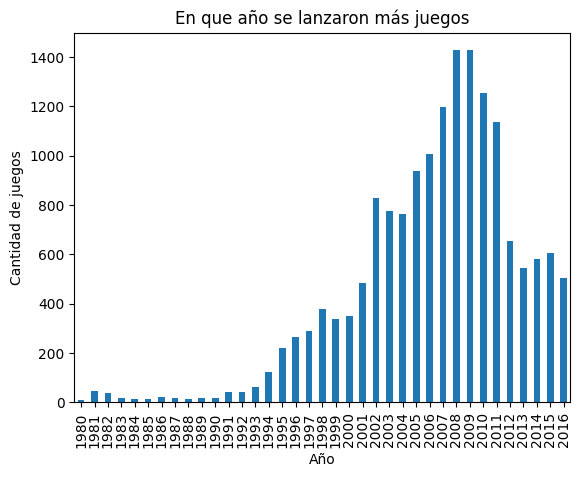

Estos son los 5 años en los que se lanzaron más juegos

      juegos
años        
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136


In [13]:
# Creación de serie que agrupa la cantidad de juegos por año
games_for_year = sales_games.groupby('year_of_release')['name'].count().reset_index()

games_for_year.rename(columns={'year_of_release': 'años', 'name': 'juegos'}, inplace=True)
# Excluir de la serie los juegos con año `0`, eran datos ausentes
games_for_year = games_for_year[games_for_year['años'] != 0]
# Construcción de la gráfica
games_for_year.plot(kind='bar', y='juegos', x='años', legend=False)
plt.title('En que año se lanzaron más juegos')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.show()

print('Estos son los 5 años en los que se lanzaron más juegos\n')
print(games_for_year.nlargest(5,'juegos').set_index('años'))

<div class="alert alert-block alert-info">
<b>Observaciones</b> <a class="tocSkip"></a>
- Se observa que durante los años comprendidos entre 2007 y 2011, el desarrollo de videojuegos tuvo el mayor pico de lanzamientos, entre 1980 y 1993, la cantidad de videojuegos lanzados fué considerablemente inferior que el el resto de años
- La distribución de las ventas globales indica que las ventas son superiores en Norteamerica
</div>

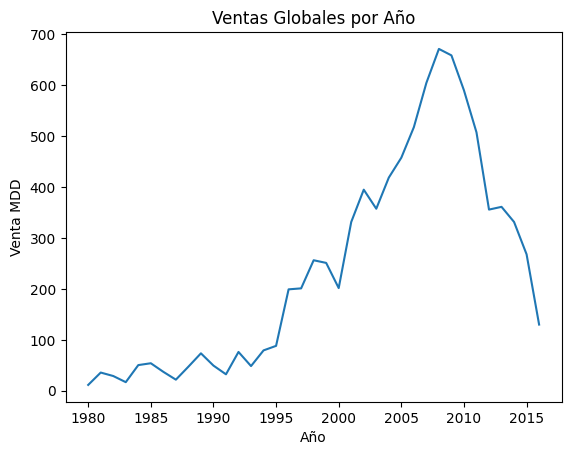

In [14]:
# Creación de serie que agrupa la cantidad vendida por año
sales_for_year = sales_games.groupby('year_of_release')['total_sales'].sum().reset_index()

sales_for_year.rename(columns={'year_of_release': 'años', 'total_sales': 'sales'}, inplace=True)
# Excluir de la serie los juegos con año `0`, eran datos ausentes
sales_for_year = sales_for_year[sales_for_year['años'] != 0]


sales_for_year.groupby('años')['sales'].sum().plot(kind='line')
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Venta MDD')
plt.show()

<div class="alert alert-block alert-info">
<b>Ventas globales</b> <a class="tocSkip"></a>
- Esta gráfica indica la cantidad de ventas globales, el crecimiento se ve proporcional a la cantidad de juegos que se lanzan al año
</div>

## Estudia el comportamiento de usuario por plataforma

De que manera se relacionan las ventas entre las diferentes plataformas.
- Primero se obtiene el listado de las diferentes plataformas

In [15]:
print(sales_games['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


- las ventas totales por plataforma son las siguientes:

Esta es la distribución de ventas globales por plataforma

            sales
platform         
PS2       1255.77
X360       971.42
PS3        939.65
Wii        907.51
DS         806.12
PS         730.86
GBA        317.85
PS4        314.14
PSP        294.05
PC         259.52
3DS        259.00
XB         257.74
GB         255.46
NES        251.05
N64        218.68
SNES       200.04
GC         198.93
XOne       159.32
2600        96.98
WiiU        82.19
PSV         54.07
SAT         33.59
GEN         30.77
DC          15.95
SCD          1.86
NG           1.44
WS           1.42
TG16         0.16
3DO          0.10
GG           0.04
PCFX         0.03


Se muestra el Top 5 de ventas globales por plataforma



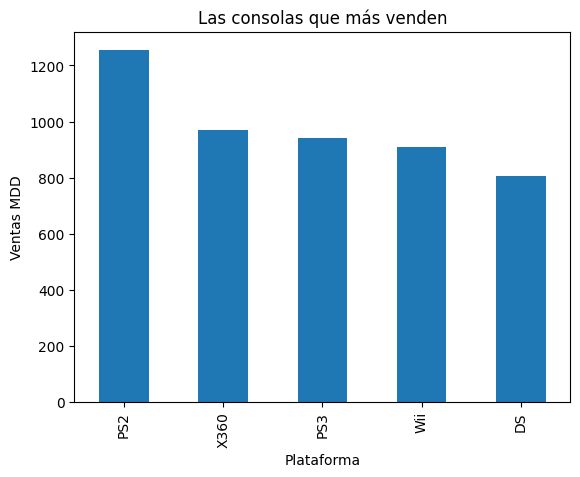

In [16]:
# Creación de serie que agrupa la cantidad vendida por año
sales_for_platform = sales_games.groupby('platform')['total_sales'].sum().reset_index()

sales_for_platform.rename(columns={'total_sales': 'sales'}, inplace=True)
# Excluir de la serie los juegos sin dato de plataforma, eran datos ausentes
sales_for_platform = sales_for_platform[
    sales_for_platform['platform'] != np.nan].sort_values(
        by='sales', 
        ascending=False).set_index('platform')

print('Esta es la distribución de ventas globales por plataforma\n')
print(sales_for_platform)

print('\n\nSe muestra el Top 5 de ventas globales por plataforma\n')
top_five_platform = sales_for_platform.nlargest(5, 'sales').groupby('platform')['sales'].sum().sort_values(ascending=False)

# Construcción de la gráfica
top_five_platform.plot(kind='bar')
plt.title('Las consolas que más venden')
plt.xlabel('Plataforma')
plt.ylabel('Ventas MDD')
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
- Las ventas por plataforma indican que las que más venden es PS2, X360 y PS3
</div>

Analizando las ventas por años de las 5 plataformas con mayores ventas. Como se distribuyen las ventas por cada plataforma a través de los años (solo del Top 5)

C:\Users\jorar\AppData\Local\Temp\ipykernel_1228\1103619425.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sales_platform_top_five['total_sales'],


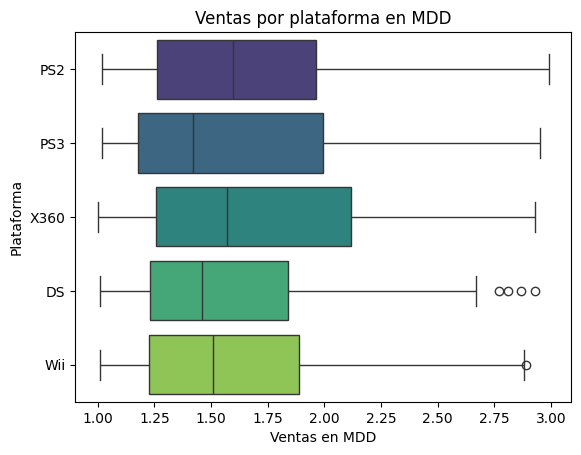

In [17]:
#lista de Top 5 de plataformas
platform_five = top_five_platform.index.to_list()

# Filtro para dejar solo los renglones del top 5 de plataformas con mayores ventas
sales_platform_five = sales_games[sales_games['platform'].isin(platform_five)]

# Filtro para quitar los registros con año cero 
sales_platform_five = sales_platform_five[sales_platform_five['year_of_release'] != 0]

# Tabla agrupada por año y plataforma
##sales_platform_top_five = pd.pivot_table(sales_platform_five, index=['year_of_release', 'platform'], values='total_sales', aggfunc=['sum']).fillna(0)

#filtro de hasta 3 MDP de venta total
sales_platform_top_five = sales_platform_five[sales_platform_five['total_sales'] < 3]

#filtro desde 1 MDP de venta total
sales_platform_top_five = sales_platform_top_five[sales_platform_top_five['total_sales'] > 1]

#construcción básica de caja y bigote
sns.boxplot(x=sales_platform_top_five['total_sales'], 
            y=sales_platform_top_five['platform'], 
            palette='viridis')
# Personalizar las etiquetas de los ejes y añadir título y leyenda
plt.xlabel("Ventas en MDD")
plt.ylabel("Plataforma")
plt.title("Ventas por plataforma en MDD")
plt.show()


<Axes: xlabel='year_of_release', ylabel='total_sales'>

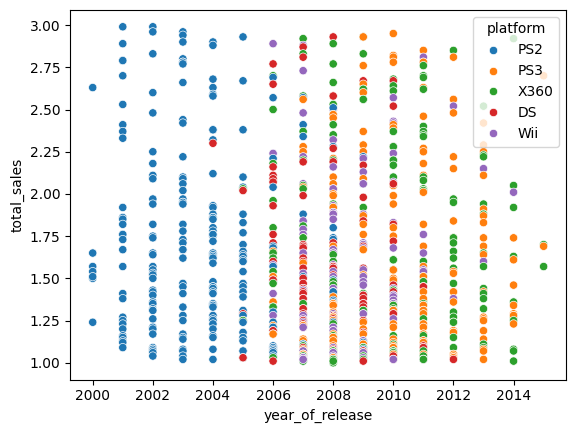

In [18]:
sns.scatterplot(data=sales_platform_top_five, x='year_of_release', y='total_sales', hue='platform')

Text(0.5, 0, 'Year')

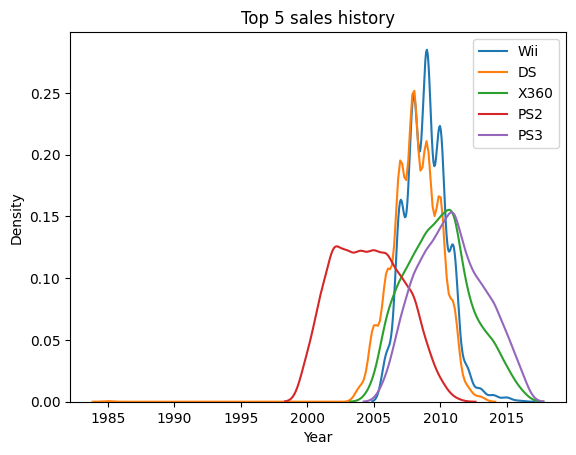

In [19]:
wii = sales_platform_five[sales_platform_five['platform'] == 'Wii']
ds = sales_platform_five[sales_platform_five['platform'] == 'DS']
x360 = sales_platform_five[sales_platform_five['platform'] == 'X360']
ps2 = sales_platform_five[sales_platform_five['platform'] == 'PS2']
ps3 = sales_platform_five[sales_platform_five['platform'] == 'PS3']


sns.kdeplot(wii['year_of_release'], label='Wii')
sns.kdeplot(ds['year_of_release'], label='DS')
sns.kdeplot(x360['year_of_release'], label='X360')
sns.kdeplot(ps2['year_of_release'], label='PS2')
sns.kdeplot(ps3['year_of_release'], label='PS3')

plt.legend()
plt.title('Top 5 sales history')
plt.xlabel('Year')


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

* Las ventas de las diferentes plataformas, varían con la aparición de una nueva consola, se observa que en promedio entre la aparición de una plataforma y la desaparición de sus ventas es de entre 9 y 11 años.

- Sin embargo una regla no escrita maneja en promedio entre 5 y 3 últimos años, se definen 4 años para este análisis

</div>

In [20]:
#filtro para solo usar los datos de 2012 al 2016
sales_games_2012_2016 = sales_games[sales_games['year_of_release'] >= 2012]

# Filtro para dejar solo los renglones del top 5 de plataformas con mayores ventas
sales_games_2012_2016 = sales_games_2012_2016[sales_games_2012_2016['platform'].isin(platform_five)].reset_index()

Con este rango de tiempo las plataformas con mayores ventas son las siguientes:

<div class="alert alert-block alert-info">
<b>Rango de años a analizar</b> <a class="tocSkip"></a>

- Se define un rango 4 años para este análisis

</div>

Estas son las cantidades de ventas del Top 5: 

platform
PS3     288.79
X360    236.54
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64




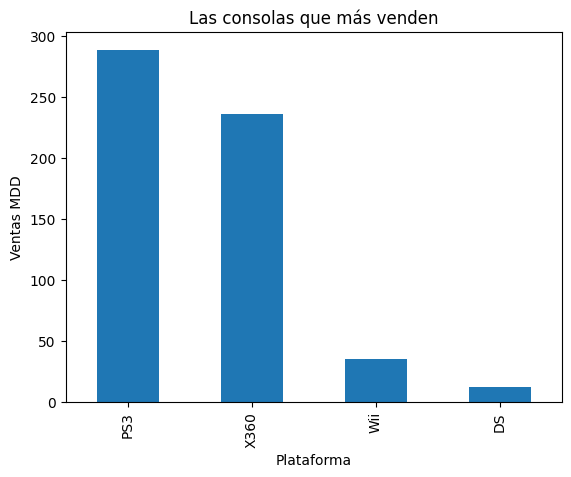

In [21]:
# Ventas del Top 5
top_sales_games_2012_2016 = sales_games_2012_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(f'Estas son las cantidades de ventas del Top 5: \n\n{top_sales_games_2012_2016}\n\n')

# Construcción de la gráfica
top_sales_games_2012_2016.plot(kind='bar')
plt.title('Las consolas que más venden')
plt.xlabel('Plataforma')
plt.ylabel('Ventas MDD')
plt.show()

<div class="alert alert-block alert-info">
<b>Plataformas con más ventas</b> <a class="tocSkip"></a>

- Considerando el rango de 2012 al 2016 las plataformas que mas venden son: PS3 y X360
</div>

La cantidad de juegos lanzados de estas plataformas

Estas son las cantidades de juegos lanzados del Top 5: 

platform
PS3     493
X360    292
Wii      54
DS       31
Name: name, dtype: int64




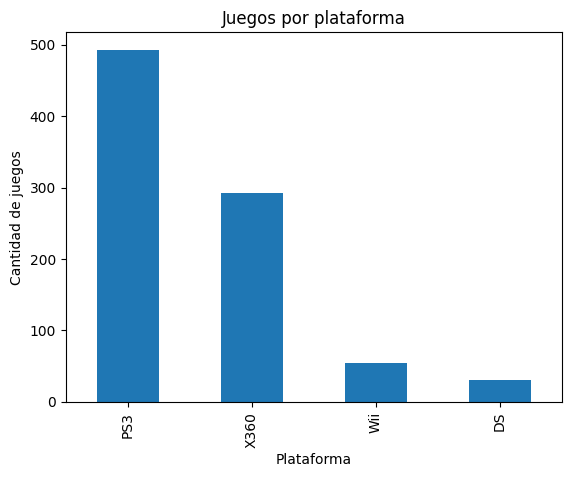

In [22]:
# Cantidad de juegos del Top 5
top_sales_games_2012_2016_title = sales_games_2012_2016.groupby('platform')['name'].count().sort_values(ascending=False)

print(f'Estas son las cantidades de juegos lanzados del Top 5: \n\n{top_sales_games_2012_2016_title}\n\n')

# Construcción de la gráfica
top_sales_games_2012_2016_title.plot(kind='bar')
plt.title('Juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de juegos')
plt.show()

## Cálculo de rentabilidad

Ahora con estos dos datos podemos obtener un porcentaje de rentabilidad con la formula: `rentabilidad =Ventas/cantidad de juegos`

Rendimiento por plataforma: 
          games  total_sales  profitability_percent
platform                                           
X360        292       236.54              81.006849
Wii          54        35.37              65.500000
PS3         493       288.79              58.578093
DS           31        12.55              40.483871




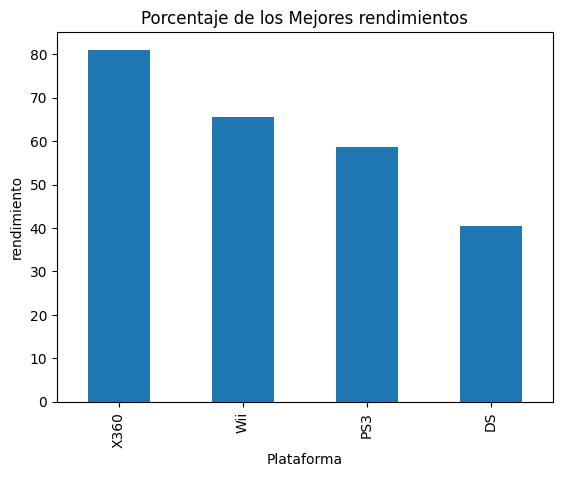

In [23]:
# Unir las dos tablas (games y sales)
profitability_platform = pd.concat([top_sales_games_2012_2016_title, top_sales_games_2012_2016], axis=1)

#Renombrer columna
profitability_platform.rename(columns={'name' : 'games'}, inplace=True)

#agregar nueva columna que calcule el rendimiento
profitability_platform['profitability_percent'] = (profitability_platform['total_sales']/profitability_platform['games'])*100

# Ordenar de acuerdo a los valores de la columna recien agregada
profitability_platform = profitability_platform.sort_values(by='profitability_percent', ascending=False)

# Mostrar los datos de la nueva tabla
print(f'Rendimiento por plataforma: \n{profitability_platform}\n\n')

# Construcción de la gráfica
profitability_platform['profitability_percent'].plot(kind='bar')
plt.title('Porcentaje de los Mejores rendimientos')
plt.xlabel('Plataforma')
plt.ylabel('rendimiento')
plt.show()

<div class="alert alert-block alert-info">
<b>Plataformas lideres</b> <a class="tocSkip"></a>

Las tres plataformas lideres en ventas, con mejor rendimiento son:
* X360
* Wii
* PS3
</div>

## Análisis de ventas por plataforma

* Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

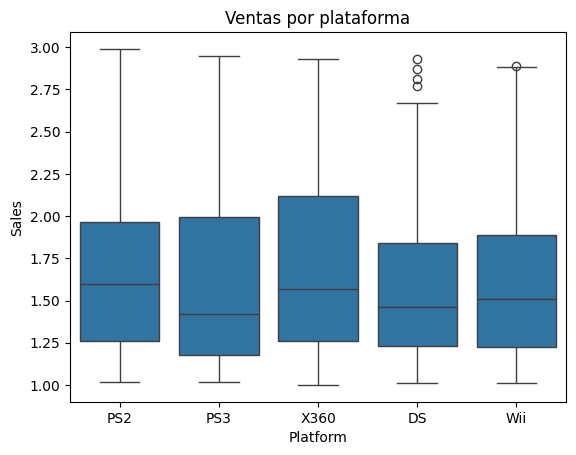

In [24]:
sns.boxplot(data=sales_platform_top_five, x='platform', y='total_sales')
plt.title("Ventas por plataforma")
plt.xlabel("Platform")
plt.ylabel("Sales")
plt.show()

<div class="alert alert-block alert-info">
<b>Observaciones</b> <a class="tocSkip"></a>

Se ajustó el rango para quitar los outliers

- ¿Son significativas las diferencias en las ventas? 
    - Las diferencias son muy significativas sobre todo comparándolas con las de la plataforma Wii.
- ¿Qué sucede con las ventas promedio en varias plataformas? 
    - El promedio es muy bajo debido a que hay juegos que vendieron mucho de manera individual y otros de la misma plataforma que sus ventas son mucho menores, por eso es que la gráfica de caja se muestra con muchos puntos (juegos) fuera del rango **"Normal"**
- Describe tus hallazgos.
    - La diferencia de las ventas entre cada uno de los juegos, incluso hablando de una sola plataforma es muy grande, esto se refleja en la cantidad de elementos que se encuentran dentro de la caja, así como la distancia tan grande comparado con el promedio de ventas de la plataforma.

    A continuación los datos de un juego que vendió mucho más que los demás de manera individual.

</div>

In [25]:
# Información de las ventas totales del juego que tiene mayores ventas
game_sales_max = sales_games_2012_2016[sales_games_2012_2016['total_sales'] == sales_games_2012_2016['total_sales'].max()]
print(f'Datos del juego que mayor venta tiene: \n\n{game_sales_max}')

Datos del juego que mayor venta tiene: 

   index                name platform  year_of_release   genre  na_sales  \
0     16  Grand Theft Auto V      PS3             2013  Action      7.02   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      9.09      0.98         3.96          97.0         8.2      M   

   total_sales  
0        21.05  


## Estudia el comportamiento de las ventas de acuerdo a las reseñas de los usuarios

* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

La correlación de las ventas con la puntuación que los usuarios le dan al juego, considerando las 5 principales plataformas es: 0.007137955179686118


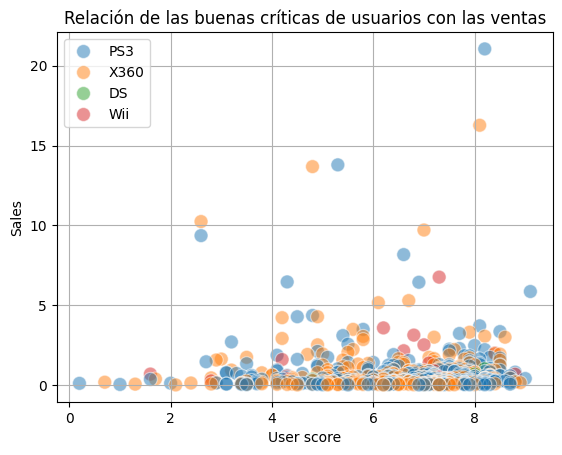

In [26]:
# Correlación de todos los juegos
corr_tot = sales_games_2012_2016['total_sales'].corr(sales_games_2012_2016['user_score'])
print(f'La correlación de las ventas con la puntuación que los usuarios le dan al juego, considerando las 5 principales plataformas es: {corr_tot}')

# Creación de gráfica
sns.scatterplot(data=sales_games_2012_2016, x='user_score', y='total_sales', alpha=0.5, s=100, hue='platform')
plt.title("Relación de las buenas críticas de usuarios con las ventas")
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel("User score")
plt.ylabel("Sales")
plt.show()

<div class="alert alert-block alert-info">
<b>Correlación de `user_score`</b> <a class="tocSkip"></a>

- No existe correlación clara entre el `user_score` y las ventas
</div>

La correlación de las ventas con la puntuación que los usuarios le dan al juego, considerando solo la plataforma Wii es: 0.2961968000747953


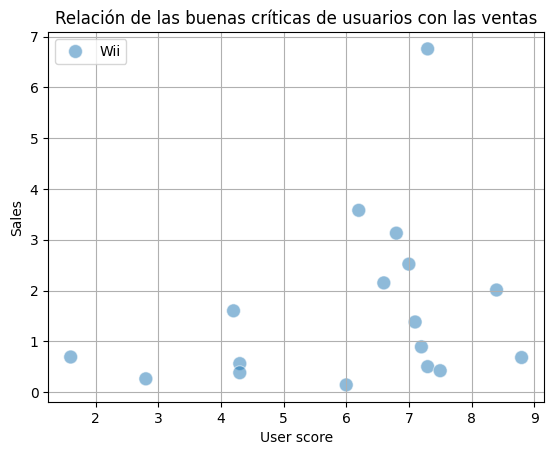

In [27]:
#Correlación de la plataforma Wii
sales_games_wii = sales_games_2012_2016[sales_games_2012_2016['platform'] == 'Wii']
corr_wii = sales_games_wii['total_sales'].corr(sales_games_wii['user_score'])
print(f'La correlación de las ventas con la puntuación que los usuarios le dan al juego, considerando solo la plataforma Wii es: {corr_wii}')

# Creación de gráfica
sns.scatterplot(data=sales_games_wii, x='user_score', y='total_sales', alpha=0.5, s=100, hue='platform')
plt.title("Relación de las buenas críticas de usuarios con las ventas")
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel("User score")
plt.ylabel("Sales")
plt.show()

<div class="alert alert-block alert-info">
<b>Observaciones</b> <a class="tocSkip"></a>

Con los datos anteriores se concluye que no existe una correlación directa entre las variables ventas totales y la calificación de los usuarios a los diferentes juegos.

El único caso que si parecería tener esa correlación es el que se mostro en el punto anterior como el juego mas vendido `Wii Sports` con 82.54 MDD de ventas y 8.0 como `user_score`

</div>

## Estudiar las ventas de los mismos juegos en diferentes plataformas

* Comparemos las ventas de los mismos juegos en otras plataformas.
    - Primero vamos cuantos juegos se duplican

In [28]:
# Código para filtrar la lista de juegos en más de una plataforma
multiplatforms_games = sales_games[sales_games['name'].duplicated()].set_index('name').sort_index()

print(multiplatforms_games.head())

                       platform  year_of_release     genre  na_sales  \
name                                                                   
 Frozen: Olaf's Quest        DS             2013  Platform      0.21   
007: Quantum of Solace       PC             2008    Action      0.01   
007: Quantum of Solace      PS3             2008    Action      0.43   
007: Quantum of Solace      Wii             2008    Action      0.29   
007: Quantum of Solace      PS2             2008    Action      0.17   

                        eu_sales  jp_sales  other_sales  critic_score  \
name                                                                    
 Frozen: Olaf's Quest       0.26      0.00         0.04           NaN   
007: Quantum of Solace      0.01      0.00         0.00          70.0   
007: Quantum of Solace      0.51      0.02         0.19          65.0   
007: Quantum of Solace      0.28      0.01         0.07          54.0   
007: Quantum of Solace      0.00      0.00         0.26  

In [29]:
# Conteo de juegos multiplataforma
print('Esta es la información general del dataframe que contiene los datos de los juegos que son multiplataforma: \n\n')
# información del dataframe
multiplatforms_games.info()

Esta es la información general del dataframe que contiene los datos de los juegos que son multiplataforma: 


<class 'pandas.core.frame.DataFrame'>
Index: 5155 entries,  Frozen: Olaf's Quest to unknown
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         5155 non-null   object 
 1   year_of_release  5155 non-null   int64  
 2   genre            5155 non-null   object 
 3   na_sales         5155 non-null   float64
 4   eu_sales         5155 non-null   float64
 5   jp_sales         5155 non-null   float64
 6   other_sales      5155 non-null   float64
 7   critic_score     3257 non-null   float64
 8   user_score       3130 non-null   float64
 9   rating           4008 non-null   object 
 10  total_sales      5155 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 483.3+ KB


In [30]:
# Filtro para mostrar solo las tres columnas que se usarán para el analisis
multiplatforms_games = multiplatforms_games[['platform', 'total_sales']]

# filtro para obtener los juegos con mayores ventas
unique_game = multiplatforms_games.nlargest(5, 'total_sales')

# Obtener listado de valores unicos
unique_game = unique_game.index.unique()

print('Este es el listado de los principales juegos multiplataforma con más ventas: \n\n')

print(unique_game)

Este es el listado de los principales juegos multiplataforma con más ventas: 


Index(['Grand Theft Auto V', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops'],
      dtype='object', name='name')


In [31]:
# Filtrar el DataFrame utilizando la lista de valores únicos
multiplatforms_games_filter = multiplatforms_games[multiplatforms_games.index.isin(unique_game)].reset_index()

multiplatforms_games_filter

,name,platform,total_sales
0,Call of Duty: Black Ops,PC,1.62
1,Call of Duty: Black Ops,DS,0.58
2,Call of Duty: Black Ops,Wii,1.37
3,Call of Duty: Black Ops,PS3,12.63
4,Call of Duty: Black Ops II,WiiU,0.41
5,Call of Duty: Black Ops II,PC,1.52
6,Call of Duty: Black Ops II,X360,13.68
7,Call of Duty: Modern Warfare 3,PS3,13.33
8,Call of Duty: Modern Warfare 3,PC,1.71
9,Call of Duty: Modern Warfare 3,Wii,0.83


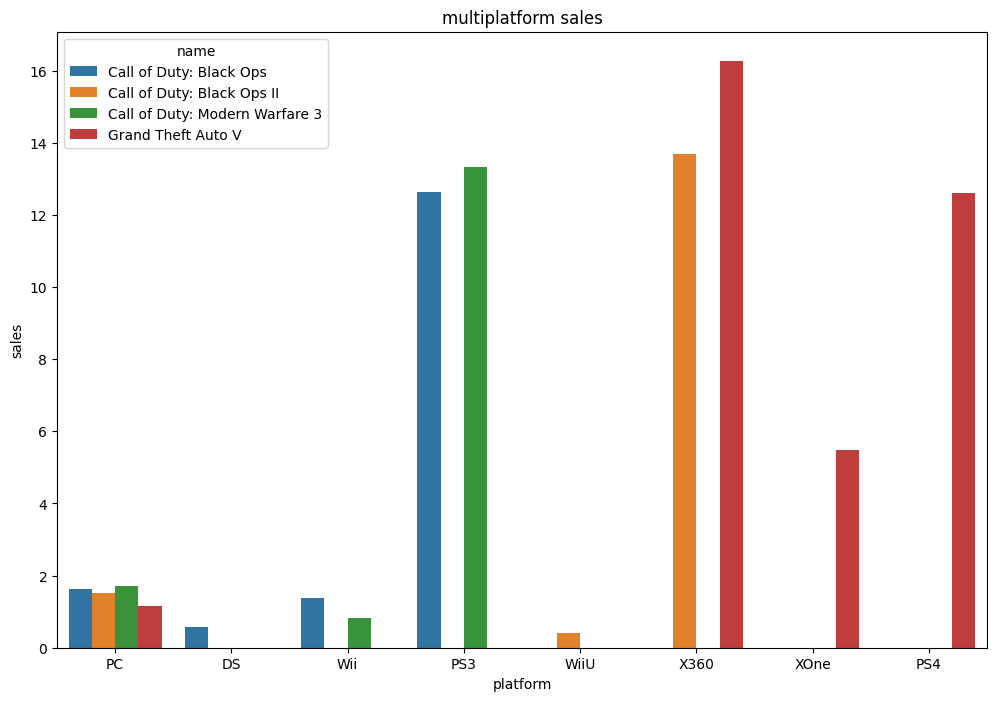

In [32]:
# creación de grafica
plt.figure(figsize=(12, 8))
sns.barplot(data=multiplatforms_games_filter, x='platform', y='total_sales', hue='name')
plt.title('multiplatform sales')
plt.xlabel('platform')
plt.ylabel('sales')
plt.show()

<div class="alert alert-block alert-info">
<b>Plataformas</b> <a class="tocSkip"></a>
- Se observa que las ventas en la plataforma PC son muy parecidas, sin embargo se disparan cuando se habla de las consolas especializadas, en este caso Xbox 360 y PS 3 y 4
</div>

## Descubrir que género se vende más

* Echa un vistazo a la distribución general de los juegos por género. 

In [33]:

print('Esta es la información de las ventas de acuerdo al genero de los juegos: \n')

print(sales_games_2012_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

Esta es la información de las ventas de acuerdo al genero de los juegos: 

genre
Action          209.92
Shooter         133.09
Sports           83.45
Role-Playing     42.56
Misc             42.05
Racing           19.98
Fighting         15.97
Adventure         9.61
Platform          9.34
Simulation        3.74
Strategy          2.74
Puzzle            0.80
Name: total_sales, dtype: float64


<div class="alert alert-block alert-info">
<b>Genero más vendido</b> <a class="tocSkip"></a>
-Se puede ver que el genero que más recaudó es el de `action` con 209.9 MDD y el que menos el de `Puzzle` que vendió 0.8 MDD
</div>

## Estudia el perfil de usuario por región

Determinar las cinco plataformas principales, los 5 generos, por cada region

In [34]:
# Ventas por region de las principales plataformas
sales_games_platform = sales_games_2012_2016.groupby(
    'platform')[
        ['na_sales', 
        'eu_sales',
        'jp_sales',
        'total_sales']
        ].sum().sort_values(
            by='total_sales',
            ascending=False).reset_index()

print('Estas son las 5 plataformas principales: \n')
sales_games_platform

Estas son las 5 plataformas principales: 



,platform,na_sales,eu_sales,jp_sales,total_sales
0,PS3,103.38,106.86,35.29,288.79
1,X360,140.05,74.52,1.57,236.54
2,Wii,17.45,11.92,3.39,35.37
3,DS,4.59,3.53,3.72,12.55


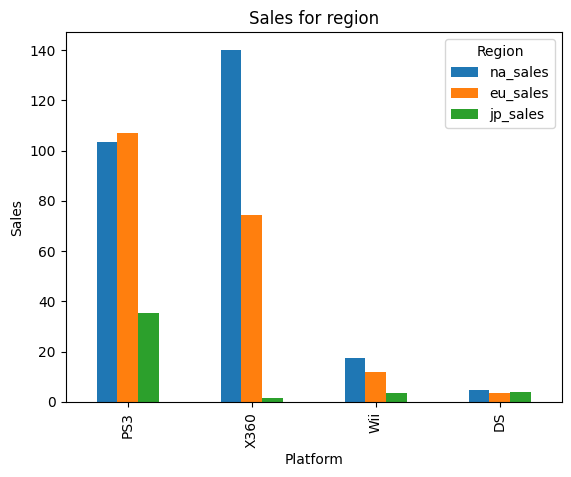

In [35]:
# Crear la gráfica de barras
sales_games_platform[['platform', 'na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', x='platform')
plt.title('Sales for region')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.show()

<div class="alert alert-block alert-info">
<b>Ventas por plataforma</b> <a class="tocSkip"></a>

* Las ventas por plataforma generalmente son mayores en la región de norteamerica
    - La consola XBox360 es la que más vende en NA
    - En la región EU vende más la consola PS3
    - en JP vende más el PS3

</div>


A continuación se buscaran los generos principales por region

           genre  na_sales
0         Action     92.39
8        Shooter     67.01
10        Sports     42.74
3           Misc     22.08
7   Role-Playing     17.08


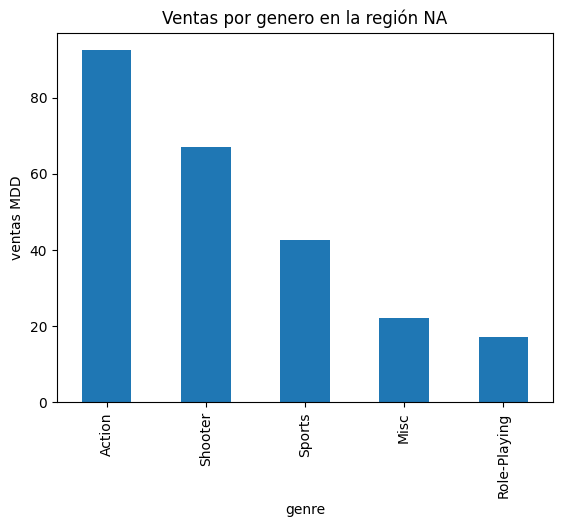

In [36]:
# filtro para obtener los datos
sales_games_region = sales_games_2012_2016.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Filtrar solo la region NA
sales_region_na = sales_games_region[['genre', 'na_sales']].nlargest(5,'na_sales')

# Construcción e gráfica
sales_region_na.plot(
    kind='bar',
    x='genre',
    legend=False,
    title='Ventas por genero en la región NA',
    ylabel='ventas MDD')

plt.show

print(sales_region_na)

<function matplotlib.pyplot.show(close=None, block=None)>

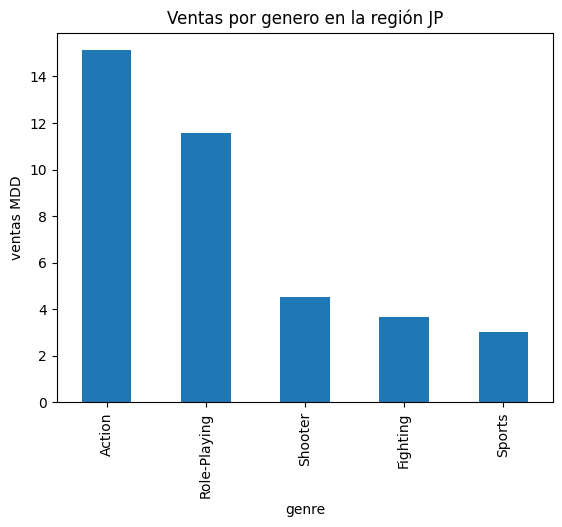

In [37]:
# Filtrar solo la region NA
sales_region_jp = sales_games_region[['genre', 'jp_sales']].nlargest(5,'jp_sales')

# Construcción e gráfica
sales_region_jp.plot(
    kind='bar',
    x='genre',
    legend=False,
    title='Ventas por genero en la región JP',
    ylabel='ventas MDD')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

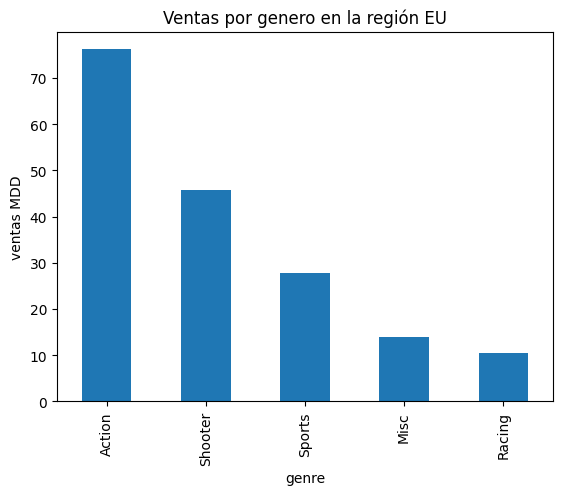

In [38]:
# Filtrar solo la region UE
sales_region_eu = sales_games_region[['genre', 'eu_sales']].nlargest(5,'eu_sales')

# Construcción e gráfica
sales_region_eu.plot(
    kind='bar',
    x='genre',
    legend=False,
    title='Ventas por genero en la región EU',
    ylabel='ventas MDD')

plt.show

<div class="alert alert-block alert-info">
<b>Generos más vendidos por región</b> <a class="tocSkip"></a>

* En las tres regiones el genero principal de juegos que se vende es el de `Action`

* En NA el genero con menos ventas es `Role-Playing`

* En JP el genero con menos ventas es `Sports`

* En EU el genero con menos ventas es `Racing`

</div>

## Prueba las hipótesis estadísticas

<div class="alert alert-block alert-info">
<b>Hipótesis</b> <a class="tocSkip"></a>

Probar la hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

- Para probar las hipótesis se fija el valor de `alpha` en 0.05.
- Hipótesis nula **Se encontró una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC**
- Hipotesis alternativa **no hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC**

</div>

In [39]:
# Crear una copia de los datos
sales_games_user_score = sales_games

# Calcular la mediana de la columna
user_score_media = sales_games_user_score['user_score'].median()

# Sustituir los valores 
sales_games_user_score['user_score'].fillna(user_score_media, inplace=True)

C:\Users\jorar\AppData\Local\Temp\ipykernel_1228\522482817.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_games_user_score['user_score'].fillna(user_score_media, inplace=True)


In [40]:
# Prueba las hipótesis
alpha = 0.05

# Filtrar los datos
sales_games_xone = sales_games_user_score[sales_games_user_score['platform'] == 'XOne']['user_score']
sales_games_pc = sales_games_user_score[sales_games_user_score['platform'] == 'PC']['user_score']

# realizar la prueba t
st.t_stat, st.pvalue = st.ttest_ind(sales_games_xone, sales_games_pc, equal_var=True)

print(f'Estadistico t: {st.t_stat}')
print(f'Valor p: {st.pvalue}')


if st.pvalue < alpha:
    print('no hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC')
elif st.pvalue > alpha:
    print('Se encontró una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC')

Estadistico t: -3.9004867777916163
Valor p: 0.00010123955107193582
no hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC


<div class="alert alert-block alert-info">
<b>Resultado de hipótesis</b> <a class="tocSkip"></a>

	- se acepta la hipotesis que las calificaciones de los usuarios para XOne y PC es igual o muy cercana.

</div>

<div class="alert alert-block alert-info">
<b>Hipótesis 2</b> <a class="tocSkip"></a>

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

- Para probar las hipótesis se fija el valor de `alpha` en 0.05.
- Hipótesis nula **no hay diferencia significativa entre las calificaciones promedio de los usuarios para los generos Acción y Deportes**
- Hipotesis alternativa **Se encontró una diferencia significativa entre las calificaciones promedio de los usuarios para los generos Acción y Deportes**

</div>

In [41]:
# Prueba las hipótesis
alpha = 0.05

# Filtrar los datos
sales_games_action = sales_games_user_score[sales_games_user_score['genre'] == 'Action']['user_score']
sales_games_sports = sales_games_user_score[sales_games_user_score['genre'] == 'Sports']['user_score']

# realizar la prueba t
st.t_stat, st.pvalue = st.ttest_ind(sales_games_action, sales_games_sports, equal_var=True)

print(f'Estadistico t: {st.t_stat}')
print(f'Valor p: {st.pvalue}')


if st.pvalue < alpha:
    print('no hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC')
elif st.pvalue > alpha:
    print('Se encontró una diferencia significativa entre las calificaciones promedio de los usuarios para los generos Acción y Deportes')

Estadistico t: 0.3676581294613721
Valor p: 0.7131417795320426
Se encontró una diferencia significativa entre las calificaciones promedio de los usuarios para los generos Acción y Deportes


In [42]:
st, p_value = st.levene(sales_games_xone, sales_games_pc)
print(f'Estadístico de Levene: {st}, Valor p: {p_value}')

Estadístico de Levene: 7.777487276480662e-05, Valor p: 0.9929649852182456


<div class="alert alert-block alert-info">
<b>Respuesta de la hipótesis 2</b> <a class="tocSkip"></a>

	- Se acepta la hipótesis que las calificaciones de los usuarios para los géneros de Acción y Deportes es diferente.

</div>

## Conclusión general

<div class="alert alert-block alert-info">
<a class="tocSkip"></a>

- Se estandarizan los nombres de columnas a solo minúsculas y “_” en lugar de espacios.
- Datos nulos:
	- En la columna name, se encontraron 2 valores ausentes y se decidió etiquetarlos como `unknown`
	- en la columna `year` existen 269 valores ausentes que por el dato que contienen no se pueden rellenar por algún campo calculado, se decide llenarlos con “0”
	- Los datos nulos en campos de ‘Score’ no se pueden rellenar por algún valor ya que podrían crear un sesgo en los datos 
	- Hay valores etiquetados como `tbd` (to be determined), estos se cambian por nulos para permitir el cálculo de esa columna
- Se enriquecieron algunas tablas para mejorar la información que contenían, agregando una suma de las ventas totales
- Se ajustan los tipos de datos de columnas que deben ser entero y flotante
- Se puede observar que en el periodo del 2007 al 2011 es cuando hay mayor cantidad de juegos lanzados
- La distribución de las ventas globales indica que las ventas son superiores en Norteamérica
- La cantidad de ventas globales es proporcional a la cantidad de juegos lanzados
- Las ventas por plataforma indican que las que más venden es PS2, X360 y PS3
- Las ventas de las diferentes plataformas, varian con la aparición de una nueva consola, se observa que en promedio entre la aparición de una plataforma y la desaparición de sus ventas es de entre 9 y 11 años.
- Considerando el rango de 2005 al 2016 las plataformas que más venden son: Xbox, PS3, Wii, DS y PS2
- Con la cantidad de juegos de estas plataformas y sus ventas se calculó la rentabilidad con la formula `rentabilidad =Ventas/cantidad de juegos`
	- Se obtiene en primer lugar a X360 con 78.02 de rentabilidad
- Se detectan muchos valores fuera del rango considerado normal, esto se debe a que existen juegos que se desarrollaron y vendieron muy poco, lo que va creando una media muy bajo que deja muchos valores como fuera de rango
- No existe una correlación clara entre el score del usuario y las ventas de los juegos
- Al comparar las ventas de los juegos en diferentes plataformas se observa que las ventas en la plataforma PC son muy parecidas, sin embargo se disparan cuando se habla de las consolas especializadas, en este caso Xbox 360 y PS 3 y 4
- El género que más recaudó es el de `action` con 849.6 MDD y el que menos el de `Strategy` que vendió 38.8 MDD
- Las ventas por pataforma son mayores en la región de norteamerica
- La consola XBox360 es la que más vende en NA
- En la región EU vende más la consola Wii
- en JP vende más el Nintendo DS
- En las regiones NA y EU el genero principal de juegos que se vende es el de `Action` y en la región JP el de `Role-Playing`
- En las regiones NA se vende el genero `Role-Playing`, en la región EU el genero principal es `Racing` y en la región JP el de `Platform`
- De las hipótesis:
	- se acepta la hipótesis que las calificaciones de los usuarios para XOne y PC es igual o muy cercana.
	- Se acepta la hipótesis que las calificaciones de los usuarios para los géneros de Acción y Deportes es diferente.

</div>